## This script contains the following:
#### 1) Importing your libraries and data

#### 2) Preparing and cleaning time-series data

#### 3)Time series analysis: decomposition

#### 4)Testing for stationarity

#### 5) Stationarizing the Matches Data


note: df_2 (datetime, value)
      
      x (datetime)

### 1) Importing your libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import quandl
import pmdarima

In [2]:
path = 'C:/Users/hp/desktop/Task 6/Task 6.1'

In [3]:
df = pd.read_csv(os.path.join(path, 'matches_clean_new.csv'))

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.columns

Index(['datetime', 'time', 'team2', 'team1_code', 'team2_code', 'round',
       'score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away', 'group',
       'matchday'],
      dtype='object')

In [7]:
df.head()

,datetime,time,team2,team1_code,team2_code,round,score1,score2,adj_score1,adj_score2,xG_Shot_Home,xG_Shot_Away,xG_Non-Shot_Home,xG_Non-Shot_Away,group,matchday
0,2016-09-13,14:45:00+00:00,Celtic,BAR,CEL,g,7,0,6.772,0.00,3.822,0.785,3.875,0.053,C,1.0
1,2016-09-13,14:45:00+00:00,Rostov,BMU,ROS,g,5,0,4.737,0.00,3.312,0.209,2.255,0.857,D,1.0
2,2016-09-13,14:45:00+00:00,Napoli,KIEV,NAP,g,1,2,1.050,2.10,0.459,1.425,0.481,0.644,B,1.0
3,2016-09-13,14:45:00+00:00,Besiktas,BEN,BES,g,1,1,1.050,1.05,1.449,0.716,1.169,1.024,B,1.0
4,2016-09-13,14:45:00+00:00,Arsenal,PSG,ARS,g,1,1,1.050,1.05,2.592,0.719,1.807,2.302,A,1.0


### 2) Creating, Preparing and Cleaning time-series data

In [59]:
df_2=df
df_2=df.iloc[:,[0,6]]

In [60]:
df_2.head()

,datetime,score1
0,2016-09-13,7
1,2016-09-13,5
2,2016-09-13,1
3,2016-09-13,1
4,2016-09-13,1


In [61]:
data_plot = df_2.set_index('datetime') # Set the datetime as the index of the dataframe.

In [64]:
data_plot.head()

,score1
datetime,
2016-09-13,7
2016-09-13,5
2016-09-13,1
2016-09-13,1
2016-09-13,1


In [65]:
data_plot.isnull().sum() 

score1    0
dtype: int64

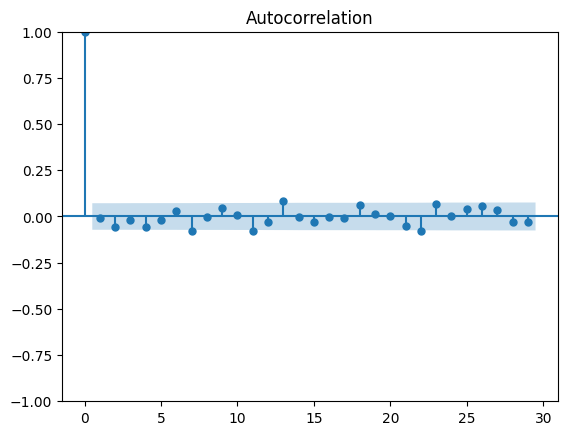

In [66]:
plot_acf(data_plot)
plt.show()

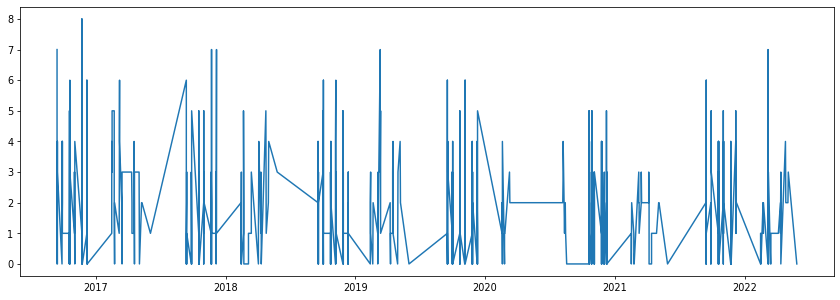

In [67]:
plt.figure(figsize=(15,5), dpi=70)
plt.plot(data_plot)

#### 3)Time series analysis: decomposition

In [68]:
data_plot.sort_index(inplace=True)

In [69]:
decomposition = sm.tsa.seasonal_decompose(data_plot, model='additive', extrapolate_trend='freq', period=1)

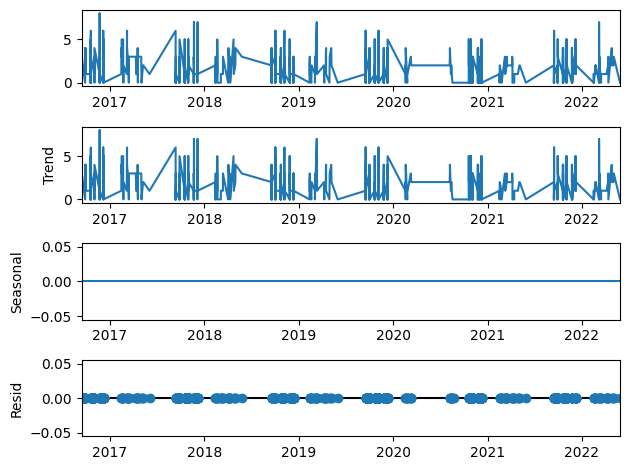

In [70]:
decomposition.plot()
plt.show()

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7
(I don't need it) right?

#### 4)Testing for stationarity

In [71]:
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [72]:
dickey_fuller(data_plot)

Dickey-Fuller Stationarity test:
Test Statistic                 -20.849123
p-value                          0.000000
Number of Lags Used              1.000000
Number of Observations Used    742.000000
Critical Value (1%)             -3.439194
Critical Value (5%)             -2.865443
Critical Value (10%)            -2.568848
dtype: float64


###### We have many observation:
###### 1)  the p-value, which indicates whether the test result is significant which is less than 0.05.
###### 2) If the test statistic is larger than the critical value, you can’t reject the null hypothesis. If the test statistic is smaller, then you can reject the null hypothesis
###### (in our example test statistic (-20.849123 is smaller than Critical Value 5% (-3.439194)) so our data is stationary.

#### 5) Stationarizing the Matches Data

In [73]:
data_diff=data_plot - data_plot.shift(2)

In [74]:
data_diff.dropna(inplace = True)

In [75]:
data_diff.head()

,score1
datetime,
2016-09-13,-6.0
2016-09-13,-4.0
2016-09-13,0.0
2016-09-13,0.0
2016-09-13,-1.0


In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.182288e+01
p-value                        8.334067e-22
Number of Lags Used            1.700000e+01
Number of Observations Used    7.240000e+02
Critical Value (1%)           -3.439414e+00
Critical Value (5%)           -2.865540e+00
Critical Value (10%)          -2.568900e+00
dtype: float64


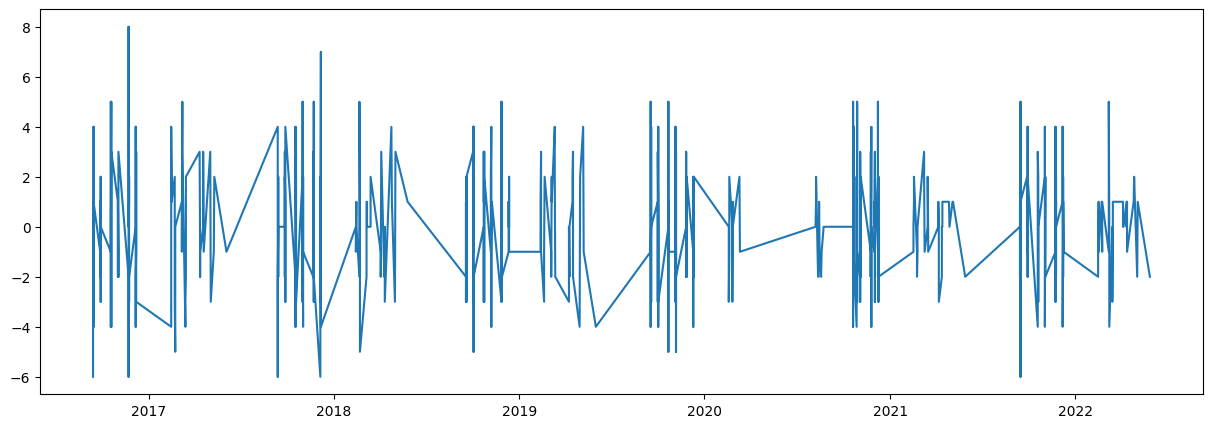

In [77]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

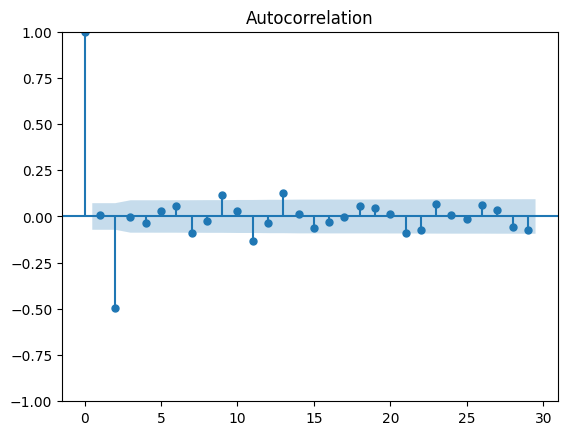

In [78]:
plot_acf(data_diff)
plt.show()

###### We don't need all these steps in this section because we already have data Stationary but to pratice how to it in other data. 